In [32]:
import pandas as pd

ev_data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)    County      City State  Postal Code  Model Year    Make  \
0  2T3YL4DV0E      King  Bellevue    WA      98005.0        2014  TOYOTA   
1  5YJ3E1EB6K      King   Bothell    WA      98011.0        2019   TESLA   
2  5UX43EU02S  Thurston   Olympia    WA      98502.0        2025     BMW   
3  JTMAB3FV5R  Thurston   Olympia    WA      98513.0        2024  TOYOTA   
4  5YJYGDEE8M    Yakima     Selah    WA      98942.0        2021   TESLA   

        Model                   Electric Vehicle Type  \
0        RAV4          Battery Electric Vehicle (BEV)   
1     MODEL 3          Battery Electric Vehicle (BEV)   
2          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
3  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4     MODEL Y          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           103.0   
1            Clean Alternative Fuel Vehicle Eligible    

In [33]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

In [34]:
ev_data.index

RangeIndex(start=0, stop=232230, step=1)

In [35]:
ev_data.shape

(232230, 17)

In [36]:
ev_data.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [37]:
ev_data = ev_data.dropna()

For the task of market size of electric vehicles analysis, we can explore the following areas:
1.	EV Adoption Over Time: Analyze the growth of the EV population by model year.
2.	Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
3.	EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
4.	Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
5.	Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
6.	Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.



Starting with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

<ipython-input-38-e910ec472edf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


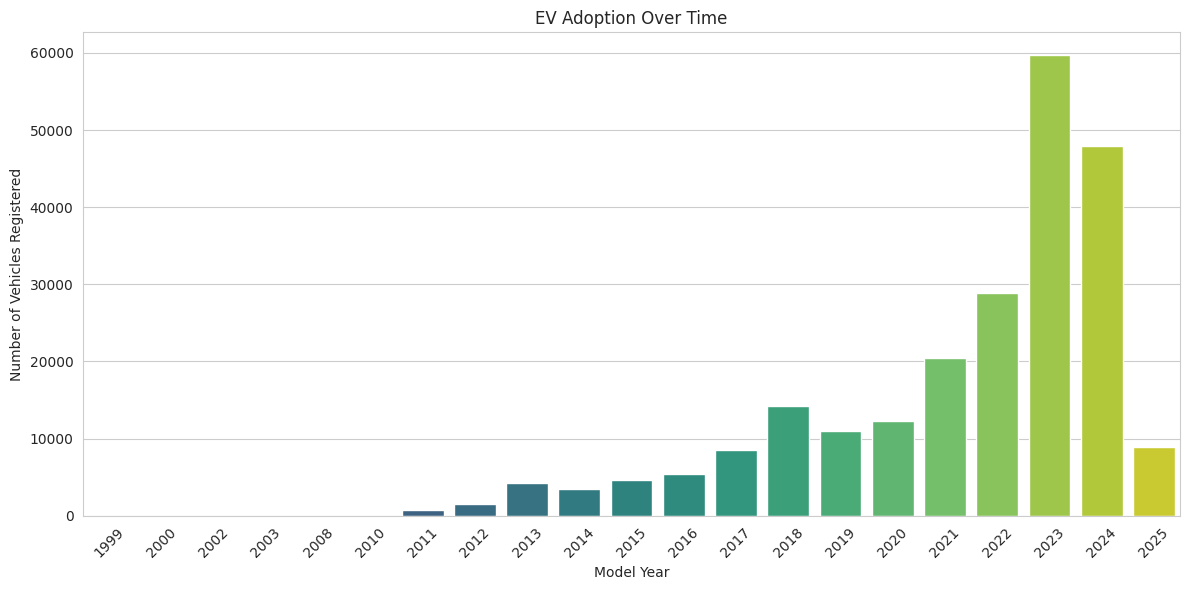

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs

Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

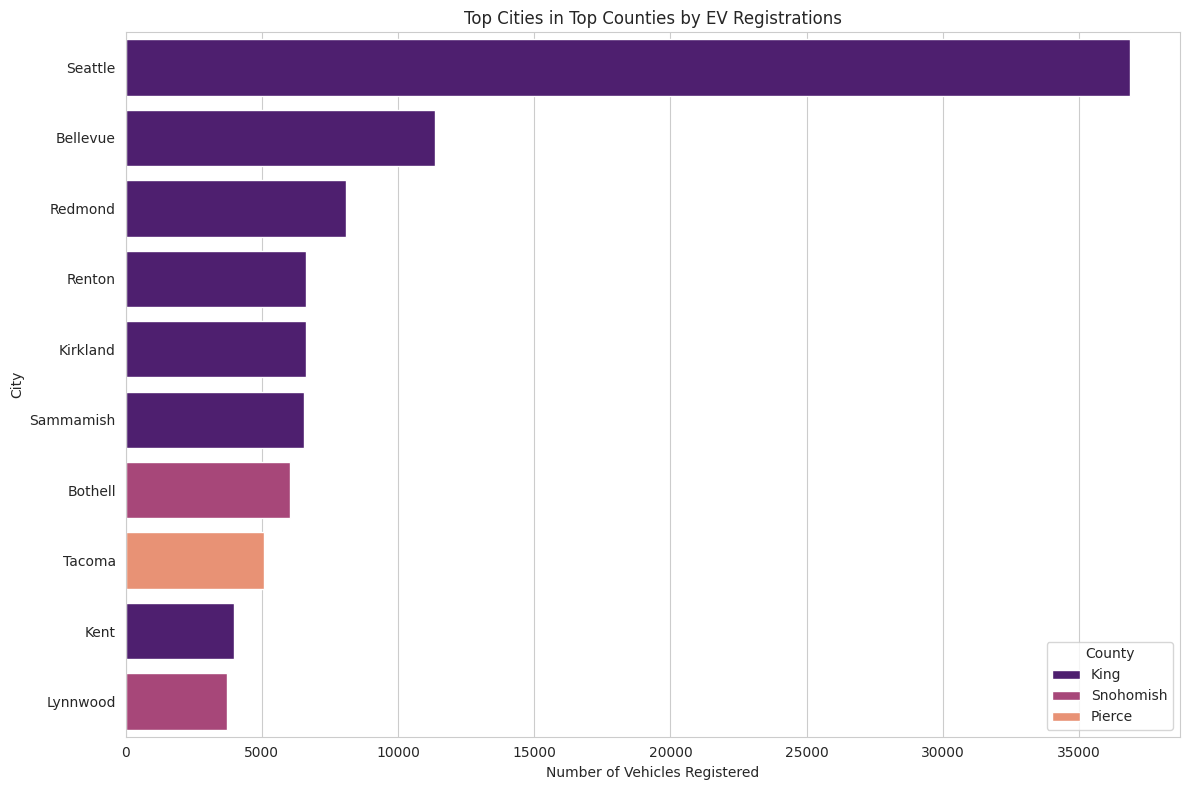

In [39]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county.

Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions. So, let’s visualize the distribution of electric vehicle types to see which categories are most popular among the registered vehicles:

<ipython-input-40-ca7a33edced1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


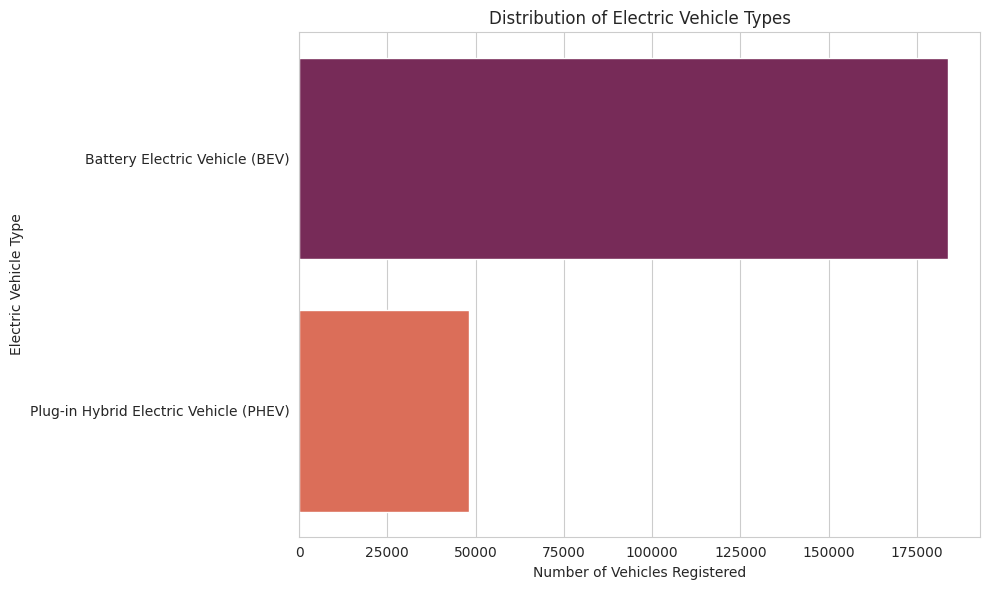

In [40]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.



Let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:


<ipython-input-41-c8e163e6ce91>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


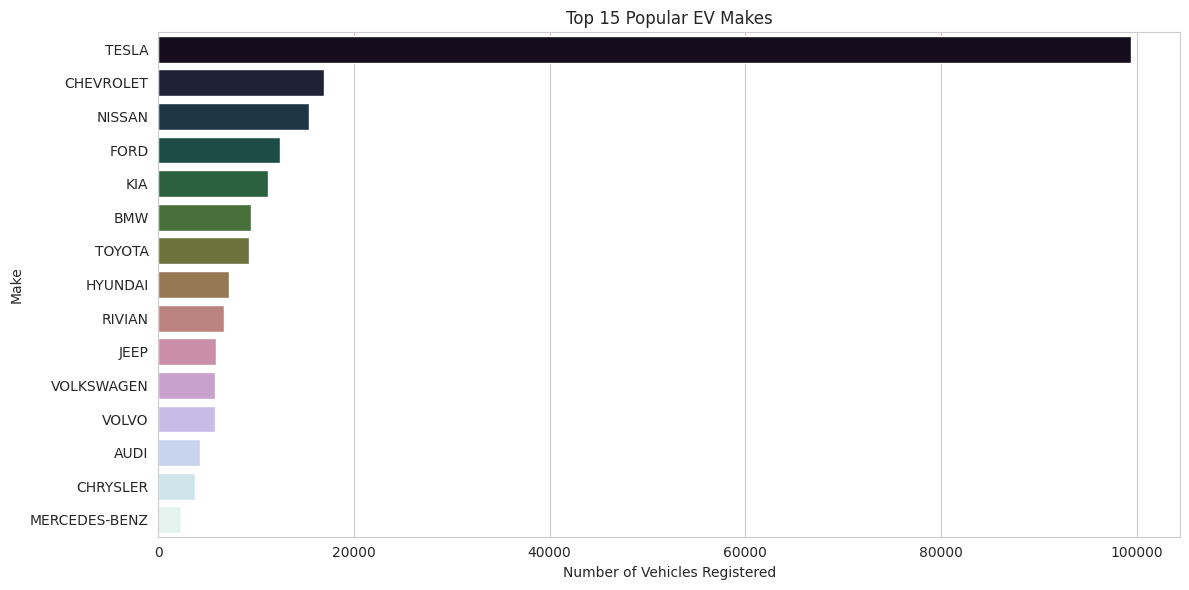

In [41]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(15)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 15 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

The above chart shows that:
•	TESLA leads by a substantial margin with the highest number of vehicles registered.
•	CHEVROLET is the second most popular manufacturer, followed by NISSAN, though both have significantly fewer registrations than TESLA.


Next, let’s get down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

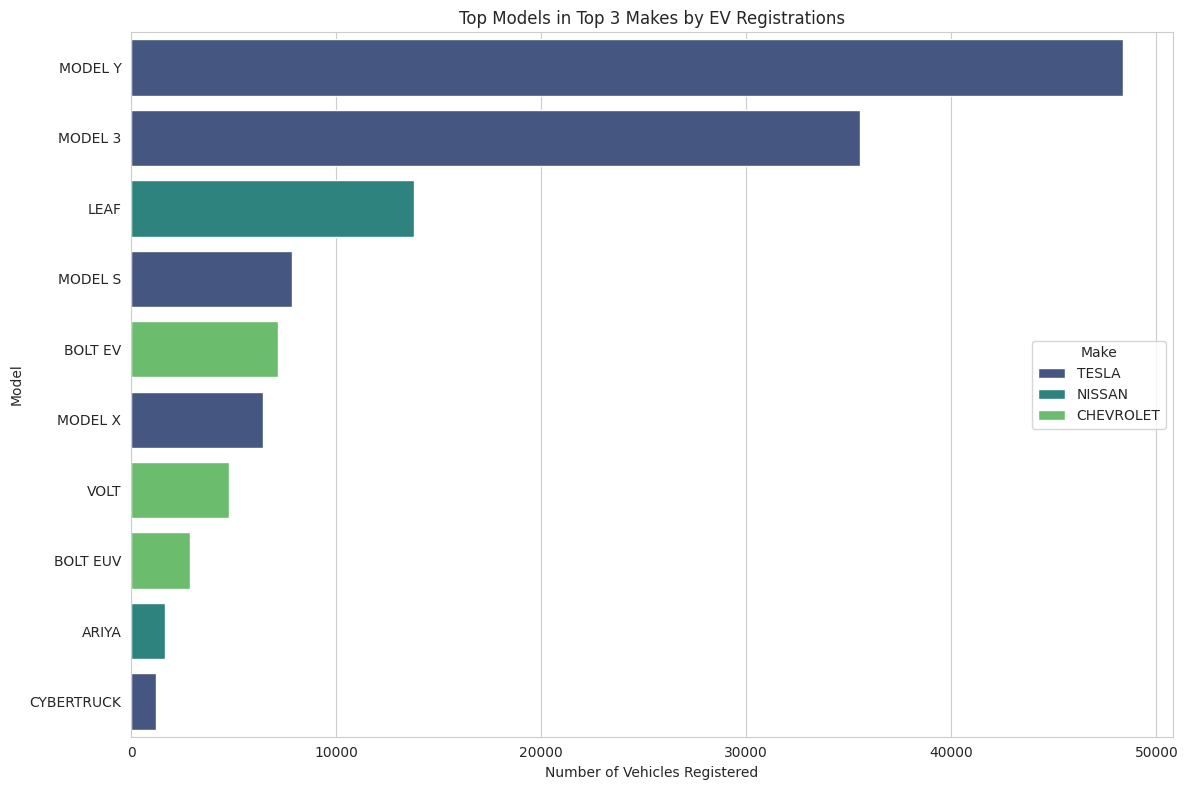

In [42]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET.

Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. This is the look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:

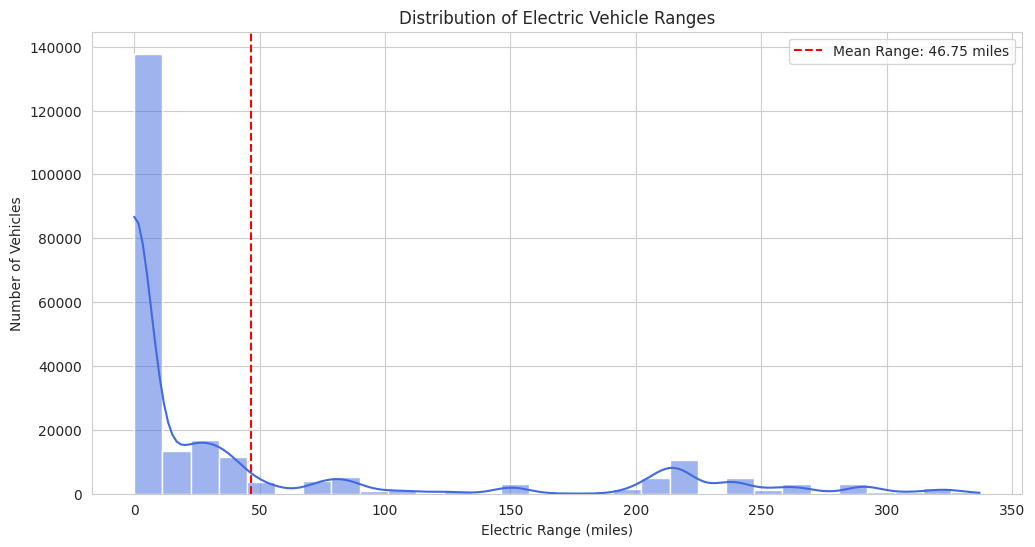

In [43]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The above graph shows:

1. **Electric Vehicle Range Distribution:** The histogram and KDE plot show the distribution of electric vehicle ranges, with the majority of vehicles having low ranges (close to zero miles).
   
2. **Mean Electric Range:** A vertical red dashed line is positioned at **46.75 miles**, indicating the mean electric range.

3. **Skewed Distribution:** The distribution is heavily skewed to the right, with a high concentration of vehicles having lower ranges and fewer vehicles achieving higher ranges beyond 100 miles. bold text

4. Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety):

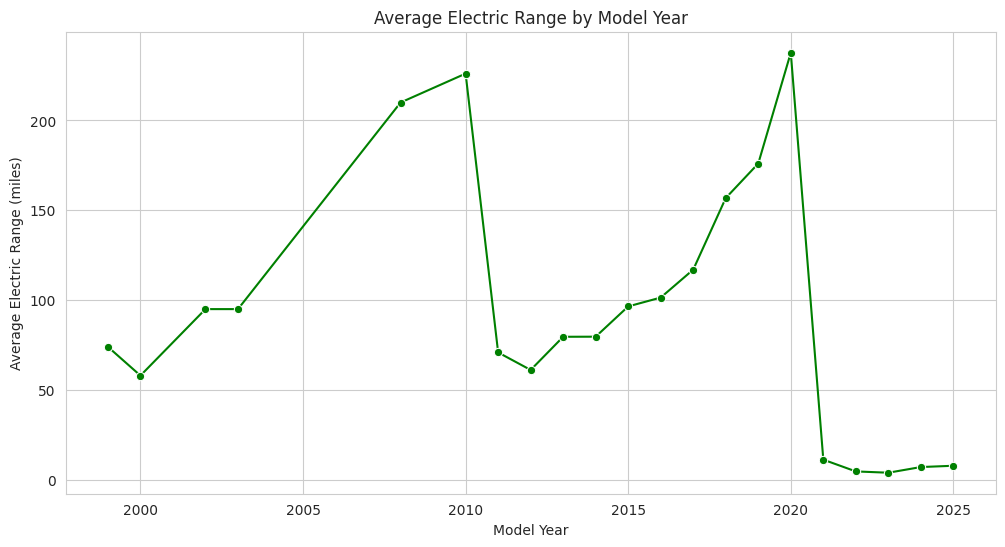

In [44]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

•	There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.

•	There is a noticeable peak around the year 2020 when the average range reaches its highest point.

•	Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.

•	After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.


The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.


Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:

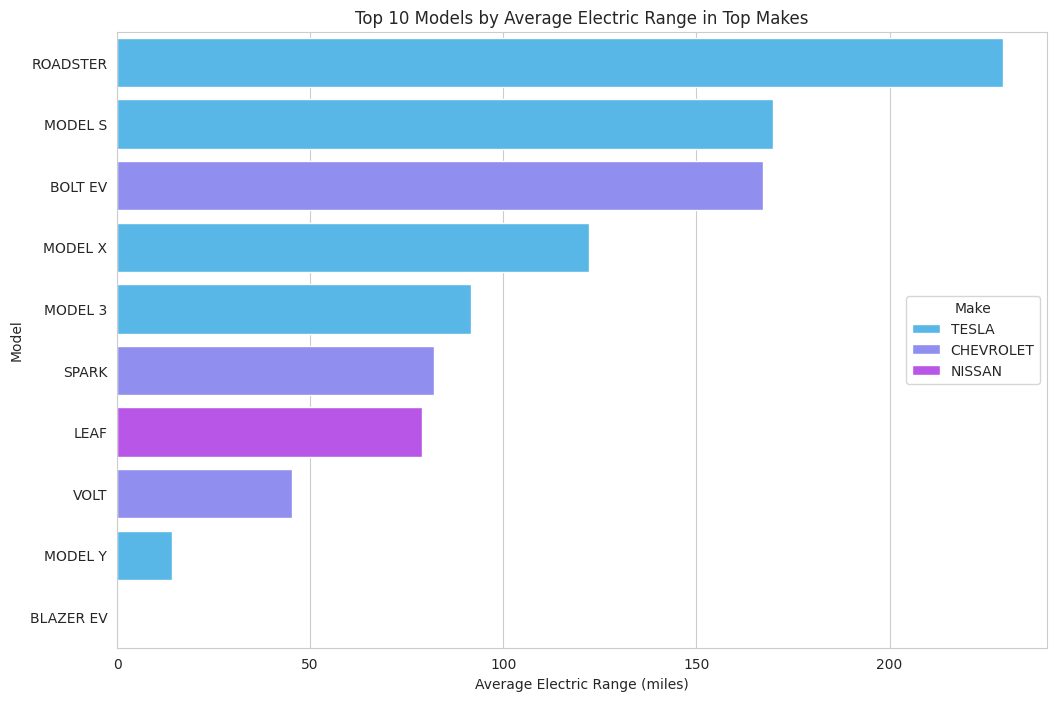

In [45]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges.

# Estimated Market Size Analysis of Electric Vehicles in the United States

Now, let’s move see finding the estimated market size of electric vehicles in the United States. Let's first count the number of EVs registered every year:

In [46]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

,count
Model Year,
1999,2
2000,7
2002,2
2003,1
2008,22
2010,23
2011,692
2012,1520
2013,4257


The dataset provides the number of electric vehicles registered each year from 1999 through 2025. However, the data for 2025 is incomplete as it only contains the data till January.

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2024) and an earlier year to project the 2025 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:



In [47]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2024 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2024]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fiting the data to the exponential growth function
try:
    params, covariance = curve_fit(exp_growth, x_data, y_data, p0=[1000, 0.2], maxfev=5000)
    a, b = params
    print(f"Optimal parameters: a = {a}, b = {b}")
except RuntimeError as e:
    print(f"Error during curve fitting: {e}")
    # Handle the error appropriately, e.g., return a default forecast or exit
    exit()

# useing the fitted function to forecast the number of EVs for 2025 and the next five years
forecast_years = np.arange(2025, 2030)  # Forecast from 2025 to 2029
forecast_years_rel = forecast_years - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years_rel, *params)

# creating a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years, forecasted_values))

print("Forecasted EV Registrations:")
for year, value in forecasted_evs.items():
    print(f"{year}: {int(value)}")

# Calculate CAGR between 2024 and 2019 (5 year period) to validate the forecast
start_year = 2019
end_year = 2024

start_value = ev_registration_counts[start_year]
end_value = ev_registration_counts[end_year]
n_years = end_year - start_year

cagr = (end_value / start_value)**(1 / n_years) - 1

print(f"\nCAGR between {start_year} and {end_year}: {cagr:.4f}")


Optimal parameters: a = 46.11048121858381, b = 0.284211745065155
Forecasted EV Registrations:
2025: 74648
2026: 99186
2027: 131790
2028: 175111
2029: 232673

CAGR between 2019 and 2024: 0.3434


This is good. The 34% CAGR (2019-2024) and a projected 32.87% CAGR (2025-2029) indicate strong and sustained growth.
The forecast aligns with historical EV adoption patterns, and if infrastructure, regulations, and demand stay favorable, it looks promising.
However, check real-world constraints to ensure feasibility.

Now, let’s plot the estimated market size data:

Optimal parameters: a = 46.11048121858381, b = 0.284211745065155
Forecasted EV Registrations:
2025: 74648
2026: 99186
2027: 131790
2028: 175111
2029: 232673


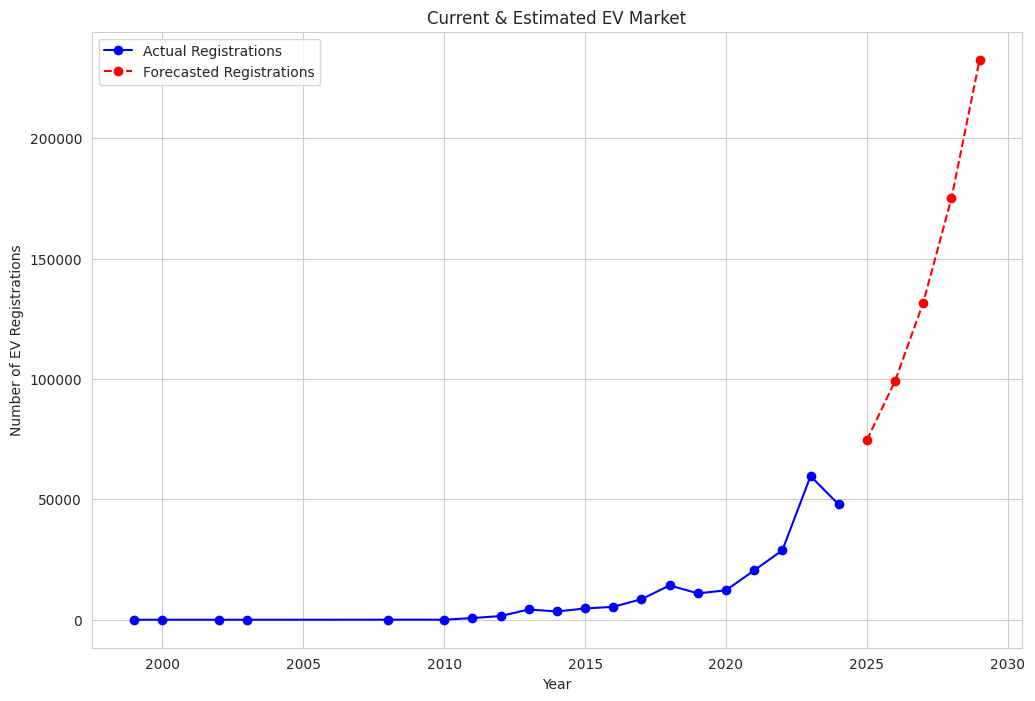

In [48]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib

# filter the dataset to include years with complete data, assuming 2024 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2024]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
try:
    params, covariance = curve_fit(exp_growth, x_data, y_data, p0=[1000, 0.2], maxfev=5000)
    a, b = params
    print(f"Optimal parameters: a = {a}, b = {b}")
except RuntimeError as e:
    print(f"Error during curve fitting: {e}")
    # Handle the error appropriately, e.g., return a default forecast or exit
    exit()

# use the fitted function to forecast the number of EVs for 2025 and the next five years
forecast_years = np.arange(2025, 2030)  # Forecast from 2025 to 2029
forecast_years_rel = forecast_years - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years_rel, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years, forecasted_values))

print("Forecasted EV Registrations:")
for year, value in forecasted_evs.items():
    print(f"{year}: {int(value)}")

# Prepare data for plotting
years = np.arange(filtered_years.index.min(), 2030)  # Correct end year
actual_years = filtered_years.index
forecast_years_full = np.arange(2025, 2030)  # Correct start year

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()


From the above graph, we can see:

•	The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.

•	The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.



# **Conclusion**

Given the rising trend in actual EV registrations and the projected acceleration in the forecast, the EV market is poised for substantial expansion. The sharp increase in expected registrations highlights growing consumer adoption, suggesting that this momentum will persist. Overall, the data signals a promising future for the EV industry, reflecting a significant shift in consumer preferences and paving the way for increased investments and business opportunities.